# Figure 1 (MF-Windspeed)

original draft of code: SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb

input data used:
    
    winds:
    baseDir = '//gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'
    ty = f'{baseDir}/UKESM_{scen}_y{yrs[i]}_wspd10m_seas_rg.nc
    
    1x1deg meshmask:
    /gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc
    

In [47]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [48]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
from scipy import stats

import pymannkendall as mk

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from importlib import reload
import matplotlib.path as mpath
import glob
import pandas as pd


### colour and scenario definitions

In [49]:
scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'ozone depletion and recovery, SSP 1-2.6',
        'color':'#E8D215',
        'runid':'TOM12_TJ_1AA1'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'ozone depletion and recovery \n SSP 3-7.0',
        'color':'#87800A',
        'runid':'TOM12_TJ_1BA1'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'no ozone depletion \n SSP 1-2.6',
        'color':'#2DC18E',
        'runid':'TOM12_TJ_2AA1'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'no ozone depletion, SSP 3-7.0',
        'color':'#18765C',
        'runid':'TOM12_TJ_2BA1'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'ozone depletion with no recovery, SSP 1-2.6',
        'color':'#FF462B',
        'runid':'TOM12_TJ_3AA1'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'ozone depletion with no recovery, SSP 3-7.0',
        'color':'#822722',
        'runid':'TOM12_TJ_3BA1'},
    'PI': {
        'hist_str': '',
        'fut_str': '',
        'name': 'PI OZONE \n PI TEMP.',
        'name2':'PI: OzonePI-PI',
        'color':'silver',
        'runid':'TOM12_TJ_PIA1'}
}


### code to extract overwater wind speed 

(done originally in SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb)

In [50]:
savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
cdomask = xr.open_dataset(savenam)
tmask = cdomask.tmask

extract = False

def make_yearlist_UKESM(yrst, yrend, scen = '1A'):
    
    baseDir = '//gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'

    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/UKESM_{scen}_y{yrs[i]}_wspd10m_seas_rg.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

if extract:
    
    ylist_UKESM_1A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '1A'))
    ylist_UKESM_2A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '2A'))
    ylist_UKESM_3A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '3A'))
    ylist_UKESM_1B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '1B'))
    ylist_UKESM_2B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '2B'))
    ylist_UKESM_3B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '3B'))

    savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
    cdomask = xr.open_dataset(savenam)
    tmask = cdomask.tmask
    
    t1 = 1950; t2 = 2101
    baseDir = '//gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'

    test = ylist_UKESM_1A.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_1A_wspd10m_overwater-50S-mean.nc')

    test = ylist_UKESM_2A.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_2A_wspd10m_overwater-50S-mean.nc')

    test = ylist_UKESM_3A.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_3A_wspd10m_overwater-50S-mean.nc')
    ##
    test = ylist_UKESM_1B.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_1B_wspd10m_overwater-50S-mean.nc')

    test = ylist_UKESM_2B.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_2B_wspd10m_overwater-50S-mean.nc')

    test = ylist_UKESM_3B.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_3B_wspd10m_overwater-50S-mean.nc')


### extract ERA5 data

In [51]:
ex = False

def make_yearlist_era(yrst, yrend):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        baseDir = '/gpfs/data/greenocean2/software/products/windsFromComponents/old/ERA5_v202303_rawdat/daily'
        ty = f'{baseDir}/ERA5_y{yrs[i]}_wspd10m_seas_rg.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist

def moving_average(a, n=10):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    ma = ret[n - 1:] / n
    return ma

def pad_avg(a, yrst = 2015, n=10):
    
    arr_no_nans = np.nan_to_num(a, nan=0.0)
    aret = np.zeros_like(a)
    aret[:] = np.nan
    ma = moving_average(arr_no_nans)
    st = int(n/2)
    en = len(ma) + st
    aret[st:en] = ma
    #aret[0:yrst-1950] = np.nan
    
    return aret

if ex:
    
    eralist = xr.open_mfdataset(make_yearlist_era(1940, 2020))

    savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
    cdomask = xr.open_dataset(savenam)
    cdomask
    tmask = cdomask.tmask

    savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
    cdomask = xr.open_dataset(savenam)
    tmask = cdomask.tmask
    print(np.nansum(cdomask['tmask_noland'].values))

    t1 = 1950
    t2 = 2100
    tseas = 'DJF'
    test = eralist.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test_djf = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])\
    .sel(time_counter=(test['time_counter.season'] == tseas))\
    .groupby('time_counter.year').mean()
    test_all = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])\
    .groupby('time_counter.year').mean()
    print(test_djf)
    
    test_djf.to_netcdf('/gpfs/home/mep22dku/scratch/SO-wind-feedback/data/fig1/ERA5_wspd10m_overwater-50S-mean-DJF.nc')
    test_all.to_netcdf('/gpfs/home/mep22dku/scratch/SO-wind-feedback/data/fig1/ERA5_wspd10m_overwater-50S-mean-FY.nc')
    
    ma_djf = pad_avg(test_djf)
    ma_all = pad_avg(test_all)

    plt.plot(np.arange(1950,2021),ma_djf)
    #plt.plot(np.arange(1950,2021),ma_djf)
    plt.plot(np.arange(1950,2021),test_djf)

    plt.xlim([1950,2020])
    plt.grid()


# LOAD PLOTTED DATA

In [52]:
#copied over to local 
baseDir = './data/fig1/'

wspd_1A = xr.open_dataset(f'{baseDir}/UKESM_1A_wspd10m_overwater-50S-mean.nc')
wspd_2A = xr.open_dataset(f'{baseDir}/UKESM_2A_wspd10m_overwater-50S-mean.nc')
wspd_3A = xr.open_dataset(f'{baseDir}/UKESM_3A_wspd10m_overwater-50S-mean.nc')
wspd_1B = xr.open_dataset(f'{baseDir}/UKESM_1B_wspd10m_overwater-50S-mean.nc')
wspd_2B = xr.open_dataset(f'{baseDir}/UKESM_2B_wspd10m_overwater-50S-mean.nc')
wspd_3B = xr.open_dataset(f'{baseDir}/UKESM_3B_wspd10m_overwater-50S-mean.nc')

test_djf = xr.open_dataset('/gpfs/home/mep22dku/scratch/SO-wind-feedback/data/fig1/ERA5_wspd10m_overwater-50S-mean-DJF.nc')
test_all = xr.open_dataset('/gpfs/home/mep22dku/scratch/SO-wind-feedback/data/fig1/ERA5_wspd10m_overwater-50S-mean-FY.nc')

### moving average for ERA5

In [53]:
test_djf = test_djf.wspd10m.values
test_all = test_all.wspd10m.values
ma_djf = pad_avg(test_djf)
ma_all = pad_avg(test_all)

# * MAIN FIGURE * Version with noto sans for paper

In [54]:
scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'ozone loss and recovery  \n SSP 1-2.6',
        'color':'#E8D215',
        'runid':'TOM12_TJ_1AA1'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'ozone loss and recovery \n SSP 3-7.0',
        'color':'#87800A',
        'runid':'TOM12_TJ_1BA1'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'no ozone loss \n SSP 1-2.6',
        'color':'#2DC18E',
        'runid':'TOM12_TJ_2AA1'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'no ozone loss \n SSP 3-7.0',
        'color':'#18765C',
        'runid':'TOM12_TJ_2BA1'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'ozone loss with no recovery  \n SSP 1-2.6',
        'color':'#FF462B',
        'runid':'TOM12_TJ_3AA1'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'ozone loss with no recovery  \n SSP 3-7.0',
        'color':'#822722',
        'runid':'TOM12_TJ_3BA1'},
    'PI': {
        'hist_str': '',
        'fut_str': '',
        'name': 'PI OZONE \n PI TEMP.',
        'name2':'PI: OzonePI-PI',
        'color':'silver',
        'runid':'TOM12_TJ_PIA1'}
}


Adjusted figure size (inches): [5.92 6.7 ]


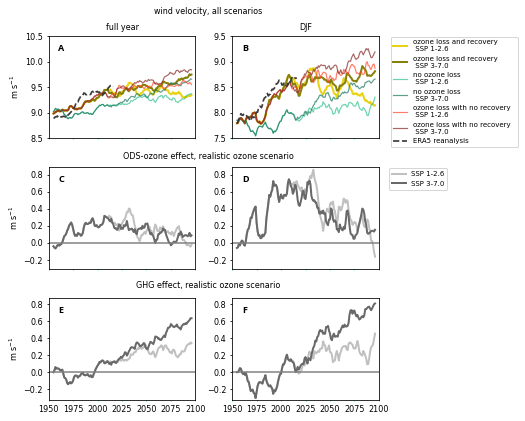

Figure size (inches): [5.92 6.7 ]
Figure size (pixels): 426 x 482


<Figure size 432x288 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Specify the paths to the Noto Sans font files
noto_sans_regular = "/gpfs/home/mep22dku/scratch/Noto_Sans/static/NotoSans-Regular.ttf"
noto_sans_bold = "/gpfs/home/mep22dku/scratch/Noto_Sans/static/NotoSans-Bold.ttf"

# Create FontProperties objects for Noto Sans
noto_font_regular = font_manager.FontProperties(fname=noto_sans_regular)
noto_font_bold = font_manager.FontProperties(fname=noto_sans_bold)

# Disable LaTeX rendering
plt.rcParams['text.usetex'] = False

# Update rcParams to use the Noto Sans font globally
plt.rcParams.update({
    'font.size': 8,
    'font.family': noto_font_regular.get_name(),  # Set the font family globally
})

fs = 8

fig, axs = plt.subplots(3,2, figsize=(5.92,6.7), facecolor='w', edgecolor='k')
axs = axs.ravel()
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']
lws = [2, 2, 1.2, 1.2, 1.2, 1.2]
talph = [1, 1, 0.7, 0.7, 0.7, 0.7]
wspd_2A_50 = wspd_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
wspd_2B_50 = wspd_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

wspdset_o3 = [(wspd_1A-wspd_2A),(wspd_1B-wspd_2B)]
scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
scens_o3 = ['ozone depl.-fixed ozone \n (SSP 3-7.0)', 'ozone depl.-fixed ozone \n (SSP 1-2.6)',\
            'ozone rec .-fixed ozone \n (SSP 3-7.0)', 'ozone rec .-fixed ozone \n (SSP 1-2.6)']
lws_o3 = [1, 1, 2.5, 2.5]
talph_o3 = [0.7, 0.7, 1, 1]

cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']
cols_o3 = [ 'silver','dimgrey']
cols_t = ['dimgrey', 'silver']
scens_t = ['fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 3-7.0)',\
           'fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 1-2.6)']

var = 'wspd10m'; vardesc = 'wind speed'; ylab = 'm s$^{-1}$'

############## lines
tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i], fontsize = fs+2)

for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = lws[x], alpha = talph[x], label = scendict[tsc]['name2'])
      
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = lws[x], alpha = talph[x], label = scendict[tsc]['name2'])
    
axs[0].plot(tv.year[0:71],ma_all, color = '#3b3b3b', linestyle = '--', linewidth = 1.7, label = 'ERA5 reanalysis')
axs[1].plot(tv.year[0:71],ma_djf, color = '#3b3b3b', linestyle = '--', linewidth = 1.7, label = 'ERA5 reanalysis')

##### ozone effect

scens_o3 = ['SSP 1-2.6', 'SSP 3-7.0']

ind = 2
for x in range(0,2):
    tsc = scens_o3[x]
    wspd = wspdset_o3[x]
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol.plot(ax = axs[0+ind], color = cols_o3[x], linewidth = lws[x], alpha = talph[x], label = scens_o3[x])    
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol.plot(ax = axs[1+ind], color = cols_o3[x], linewidth  = lws[x], alpha = talph[x], label = scens_o3[x])
    
    
#######################
##### temperature effect
scens_t = [ 'SSP 3-7.0','SSP 1-2.6']

ind = 4; tlw = 2

###
tv = wspd_2A[var].groupby('time_counter.year').mean()-\
wspd_2A_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol.plot(ax = axs[0+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol.plot(ax = axs[1+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2B[var].groupby('time_counter.year').mean()-\
wspd_2B_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol.plot(ax = axs[0+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol.plot(ax = axs[1+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])


##################
### titles, etc

for i in range(0,6):
    axs[i].tick_params(axis="x", direction="out", length=1, width=1, color="turquoise")
    #axs[i].grid(alpha = 0.5)
    
for i in range(0,6):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xlabel('')
    
for i in range(1,6):
    axs[i].set_xlim([1950,2100])
    axs[i].set_ylabel('')
    
for i in range(0,6):
    axs[i].axhline(y=0, color = 'grey')
    
lab = ['A','B'] 
ymi = np.array([8.5,7.5])  
hi = 2
for i in range(0,2):
    axs[i].set_ylim([ymi[i],ymi[i]+hi])
    axs[i].text(1960,ymi[i]+0.85*hi,lab[i], fontproperties = noto_font_bold, fontsize = fs+1)
    
lab = ['C','D']  
ymi = np.array([-0.31,-0.31,])  
hi = 1.2
for i in range(0,2):
    axs[i+2].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+2].text(1960,ymi[i]+0.85*hi,lab[i], fontproperties = noto_font_bold, fontsize = fs+1)
    
lab = ['E','F']  
ymi = np.array([-0.33,-0.33,])  
for i in range(0,2):
    axs[i+4].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+4].text(1960,ymi[i]+0.85*hi,lab[i], fontproperties = noto_font_bold, fontsize = fs+1)

tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,2):
    axs[i].set_title(tits[i], fontsize = fs)

axs[0].set_ylabel('m s$^{-1}$')
axs[2].set_ylabel('m s$^{-1}$')
axs[4].set_ylabel('m s$^{-1}$')


for i in range(0,4):
    axs[i].set_xticklabels([])


t1 = 'wind velocity, all scenarios'
t2 = 'ODS-ozone effect, realistic ozone scenario'
t3 = 'GHG effect, realistic ozone scenario'

plt.subplots_adjust(hspace = 0.28 )
plt.subplots_adjust(wspace = 0.25 )
plt.figtext(0.5,0.94, t1, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.64, t2, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.373, t3, ha="center", va="top", fontsize=fs, color="k")

for i in range(0,6):
    axs[i].tick_params(axis='y', length=2)

legend = axs[0].legend(bbox_to_anchor = [3.22,1.03], fontsize = 7, frameon=True)
axs[2].legend(bbox_to_anchor = [2.74,1.02], fontsize = 7, frameon=True)

legend_box = legend.get_window_extent(renderer=fig.canvas.get_renderer())

# Convert pixels to inches
dpi = fig.dpi
legend_width_inches = legend_box.width / dpi  # Extra width legend takes

# Increase figure width to fit the legend
new_width = fig.get_size_inches()[0] + legend_width_inches
#fig.set_size_inches(new_width, fig.get_size_inches()[1])

# Print final size
print("Adjusted figure size (inches):", fig.get_size_inches())

plt.show()

save = True
if save:
    plt.tight_layout()
    fname = './figs/RMF-1.jpg'
    fig.savefig(fname, transparent=None, dpi=300, format=None,
            metadata=None, bbox_inches='tight', pad_inches=0.1,
            facecolor='auto', edgecolor='auto', backend=None,\
           )
    
    print("Figure size (inches):", fig.get_size_inches())

    # Convert to pixels (optional)
    dpi = fig.dpi
    width_px, height_px = fig.get_size_inches() * dpi
    print(f"Figure size (pixels): {width_px:.0f} x {height_px:.0f}")


    import jpgtopdf as jp
    jp.convert_jpg_to_pdf('./figs/RMF-1.jpg', './figs/RMF-1-hq.pdf')



### calculate trend sizes by season and 50-years for supplement table

In [56]:

import pymannkendall as mk
from scipy import stats

def give_trends(ts_y):

    ts_x = np.arange(0,len(ts_y))
    trend, h, mk_p, z, Tau, s, var_s, mk_slope, intercept = mk.original_test(ts_y)
    lin_slope, intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_p, lin_slope, lin_p



In [57]:
tdar = [wspd_2A, wspd_1A, wspd_3A, wspd_2B, wspd_1B, wspd_3B]

sinds = [0,50,100]
einds = [50,100,150]
for w in range(0,3):
    
    sind = sinds[w]
    eind = einds[w]

    data = np.zeros([5,6])
    sig = np.zeros([5,6])

    for i in range(0,6):

        tdat = tdar[i]
        td = tdat
        td = td.wspd10m.groupby('time_counter.year').mean().values[sind:eind]
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[0,i] = lin_slope* 10
        sig[0,i] = lin_p


        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'DJF')).\
        groupby('time_counter.year').mean().values[sind:eind]
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[1,i] = lin_slope* 10
        sig[1,i] = lin_p


        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'MAM')).\
        groupby('time_counter.year').mean().values[sind:eind]
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[2,i] = lin_slope* 10
        sig[2,i] = lin_p

        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'JJA')).\
        groupby('time_counter.year').mean().values[sind:eind]
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[3,i] = lin_slope* 10
        sig[3,i] = lin_p

        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'SON')).\
        groupby('time_counter.year').mean().values[sind:eind]
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[4,i] = lin_slope * 10
        sig[4,i] = lin_p


        i = i+1


    df = pd.DataFrame(data, columns=['2A','1A','3A','2B','1B','3B'],\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])
    df2 = pd.DataFrame(sig, columns=['2A','1A','3A','2B','1B','3B'],\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])

    df.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
    df.to_csv(f'./figs/Fig1-trends-{1950+sind}-{1950+eind}.csv')
    df2.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
    df2.to_csv(f'./figs/Fig1-trendsig-{1950+sind}-{1950+eind}.csv')

    print(df)

                 2A        1A        3A        2B        1B        3B
full year -0.009782  0.063205  0.066654 -0.009782  0.063205  0.066654
DJF       -0.042000  0.121807  0.126688 -0.042000  0.121807  0.126688
MAM       -0.000399  0.031277  0.019486 -0.000399  0.031277  0.019486
JJA       -0.000500  0.005949  0.021518 -0.000500  0.005949  0.021518
SON        0.003773  0.093785  0.098925  0.003773  0.093785  0.098925
                 2A        1A        3A        2B        1B        3B
full year  0.035808  0.022432  0.042329  0.051855  0.039205  0.063201
DJF        0.046908  0.002365  0.077933  0.091163  0.041685  0.119694
MAM        0.051708  0.042937  0.039307  0.066554  0.060209  0.064752
JJA        0.034806  0.031909 -0.001524  0.042105  0.005594  0.023296
SON        0.009811  0.012517  0.053601  0.007596  0.049333  0.045064
                 2A        1A        3A        2B        1B        3B
full year  0.015641 -0.019958  0.021029  0.071768  0.062436  0.062794
DJF        0.038726 

### calculate end of century warming effect sizes referenced in text

In [58]:
tv = wspd_2A[var].groupby('time_counter.year').mean()-\
wspd_2A_50[var].mean().values

print(np.nanmean(tv[140:150]))

tv = wspd_2B[var].groupby('time_counter.year').mean()-\
wspd_2B_50[var].mean().values

print(np.nanmean(tv[140:150]))

wspd_1A = xr.open_dataset(f'{baseDir}/UKESM_1A_wspd10m_overwater-50S-mean.nc')
wspd_1B = xr.open_dataset(f'{baseDir}/UKESM_1B_wspd10m_overwater-50S-mean.nc')

tvA = wspd_1A.groupby('time_counter.year').mean()
tvB = wspd_1B.groupby('time_counter.year').mean()
print(np.nanmean(tvA[var][140:150].values)-np.nanmean(tvA[var][0:10].values))

print(np.nanmean(tvB[var][140:150].values)-np.nanmean(tvB[var][0:10].values))


0.34858731010905064
0.6328398798458046
0.3452476784960279
0.7504957544735653


# SF - wind by season

# SF  u velocity at 40-60S

In [59]:
def make_yearlist_UKESM(yrst, yrend, scen = '1A'):
    
    baseDir = '//gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/UKESM3M'

    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/UKESM_{scen}_y{yrs[i]}_wspd10m_seas_rg.nc'#_UKESM_wind_daily_1x1_{yrs[i]}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

def get_seas_mean(yr, scen = '1A'):
    
    tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/UKESM3M/'
    
    savenam = (f'{tdir}UKESM_{scen}_y{yr}_wspd10m_seas_rg.nc')
    print(savenam)
    w = xr.open_mfdataset(make_yearlist_UKESM_seas(yr, yr, scen))
    tvar = 'wspd10m'
    djf = w[tvar].sel(time_counter=(w['time_counter.season'] == 'DJF')).values
    mam = w[tvar].sel(time_counter=(w['time_counter.season'] == 'MAM')).values
    jja = w[tvar].sel(time_counter=(w['time_counter.season'] == 'JJA')).values
    son = w[tvar].sel(time_counter=(w['time_counter.season'] == 'SON')).values

    seasns_wspd10m = np.zeros([4,180,360])
    seasns_wspd10m[0,:,:] = np.nanmean(djf, axis = 0)
    seasns_wspd10m[1,:,:] = np.nanmean(mam, axis = 0)
    seasns_wspd10m[2,:,:] = np.nanmean(jja, axis = 0)
    seasns_wspd10m[3,:,:] = np.nanmean(son, axis = 0)

    tvar = 'u10m'
    djf = w[tvar].sel(time_counter=(w['time_counter.season'] == 'DJF')).values
    mam = w[tvar].sel(time_counter=(w['time_counter.season'] == 'MAM')).values
    jja = w[tvar].sel(time_counter=(w['time_counter.season'] == 'JJA')).values
    son = w[tvar].sel(time_counter=(w['time_counter.season'] == 'SON')).values

    seasns_u10m = np.zeros([4,180,360])
    seasns_u10m[0,:,:] = np.nanmean(djf, axis = 0)
    seasns_u10m[1,:,:] = np.nanmean(mam, axis = 0)
    seasns_u10m[2,:,:] = np.nanmean(jja, axis = 0)
    seasns_u10m[3,:,:] = np.nanmean(son, axis = 0)

    tvar = 'v10m'
    djf = w[tvar].sel(time_counter=(w['time_counter.season'] == 'DJF')).values
    mam = w[tvar].sel(time_counter=(w['time_counter.season'] == 'MAM')).values
    jja = w[tvar].sel(time_counter=(w['time_counter.season'] == 'JJA')).values
    son = w[tvar].sel(time_counter=(w['time_counter.season'] == 'SON')).values

    seasns_v10m = np.zeros([4,180,360])
    seasns_v10m[0,:,:] = np.nanmean(djf, axis = 0)
    seasns_v10m[1,:,:] = np.nanmean(mam, axis = 0)
    seasns_v10m[2,:,:] = np.nanmean(jja, axis = 0)
    seasns_v10m[3,:,:] = np.nanmean(son, axis = 0)

    times = pd.to_datetime([f"{yr}-01-15", f"{yr}-04-15", f"{yr}-07-15", f"{yr}-10-15"])

    data_vars = {'wspd10m':(['time_counter', 'lat', 'lon'], seasns_wspd10m,
    {'units': 'm/s',
    'long_name':'10m wspd regridded'}),
                 'u10m':(['time_counter', 'lat', 'lon'], seasns_u10m,
    {'units': 'm/s',
    'long_name':'10m u component regridded'}),
                 'v10m':(['time_counter', 'lat', 'lon'], seasns_v10m,
    {'units': 'm/s',
    'long_name':'10m v component regridded'}),
    }
    # define coordinates
    coords = {'time_counter': (['time_counter'], times),

    'lon': (['lon'], w.lon.values),
    'lat': (['lat'], w.lat.values),
    }
    # define global attributes
    attrs = {'made in':'/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/windBandSensitivity/windbandtest.ipynb',

    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)

    ds.to_netcdf(savenam)     

ex = False

if ex:
    #'1A','1B',
    scens = ['1A','1B','2A','2B','3A','3B']
    for scen in scens:
        for y in range(1950,2101):
            get_seas_mean(y, scen = scen)

In [60]:
savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
cdomask = xr.open_dataset(savenam)
tmask = cdomask.tmask

extract = False


def get_ukesmwinds(varname = 'wspd10m', blind = 0, tlind = 40, nam = 'overwater-50S'):
    

    ylist_UKESM_1A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '1A'))
    ylist_UKESM_2A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '2A'))
    ylist_UKESM_3A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '3A'))
    ylist_UKESM_1B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '1B'))
    ylist_UKESM_2B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '2B'))
    ylist_UKESM_3B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '3B'))

    savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
    cdomask = xr.open_dataset(savenam)
    tmask = cdomask.tmask
    
    t1 = 1950; t2 = 2101
    baseDir = '//gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'

    print(f'{baseDir}')
    print(f'UKESM_1A')
    test = ylist_UKESM_1A[varname].sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(blind,tlind)).weighted(tmask.isel(lat = slice(blind,tlind)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = varname)
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_1A_{varname}_{nam}-mean.nc')
    

    test = ylist_UKESM_2A[varname].sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(blind,tlind)).weighted(tmask.isel(lat = slice(blind,tlind)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = varname)
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_2A_{varname}_{nam}-mean.nc')

    test = ylist_UKESM_3A[varname].sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(blind,tlind)).weighted(tmask.isel(lat = slice(blind,tlind)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = varname)
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_3A_{varname}_{nam}-mean.nc')
    ##
    test = ylist_UKESM_1B[varname].sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(blind,tlind)).weighted(tmask.isel(lat = slice(blind,tlind)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = varname)
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_1B_{varname}_{nam}-mean.nc')

    test = ylist_UKESM_2B[varname].sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(blind,tlind)).weighted(tmask.isel(lat = slice(blind,tlind)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = varname)
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_2B_{varname}_{nam}-mean.nc')

    print(f'UKESM_3B')
    test = ylist_UKESM_3B[varname].sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(blind,tlind)).weighted(tmask.isel(lat = slice(blind,tlind)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = varname)
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_3B_{varname}_{nam}-mean.nc')
    print(f'UKESM_3B_{varname}_{nam}-mean.nc')
        
if extract:
    
    
    get_ukesmwinds(varname = 'wspd10m', blind = 0, tlind = 40, nam = '50S-90S')
    get_ukesmwinds(varname = 'wspd10m', blind = 30, tlind = 50, nam = '40S-60S')
    get_ukesmwinds(varname = 'wspd10m', blind = 35, tlind = 45, nam = '45S-55S')

    #get_ukesmwinds(varname = 'u10m', blind = 0, tlind = 40, nam = '50S-90S')
    get_ukesmwinds(varname = 'u10m', blind = 30, tlind = 50, nam = '40S-60S')
    get_ukesmwinds(varname = 'u10m', blind = 35, tlind = 45, nam = '45S-55S')
    


In [61]:
def get_winds(nam,varname,save = True, var = 'wspd10m', \
              vardesc = 'wind speed',\
              baseDir = '//gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'):

    plt.rcParams['text.usetex'] = False
    wspd_1A = xr.open_dataset(f'{baseDir}/UKESM_1A_{varname}_{nam}-mean.nc')
    wspd_2A = xr.open_dataset(f'{baseDir}/UKESM_2A_{varname}_{nam}-mean.nc')
    wspd_3A = xr.open_dataset(f'{baseDir}/UKESM_3A_{varname}_{nam}-mean.nc')
    wspd_1B = xr.open_dataset(f'{baseDir}/UKESM_1B_{varname}_{nam}-mean.nc')
    wspd_2B = xr.open_dataset(f'{baseDir}/UKESM_2B_{varname}_{nam}-mean.nc')
    wspd_3B = xr.open_dataset(f'{baseDir}/UKESM_3B_{varname}_{nam}-mean.nc')

    ylims = True

    fs=16

    fact = 1.1
    fig, axs = plt.subplots(3,2, figsize=(7*fact, 8.35*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
    scens = ['1A', '1B', '2A', '2B', '3A', '3B']
    lws = [2.5, 2.5, 1, 1, 1, 1]
    talph = [1, 1, 0.7, 0.7, 0.7, 0.7]
    wspd_2A_50 = wspd_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
    wspd_2B_50 = wspd_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

    wspdset_o3 = [(wspd_1A-wspd_2A),(wspd_1B-wspd_2B)]
    scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
    scens_o3 = ['ozone depl.-fixed ozone \n (SSP 3-7.0)', 'ozone depl.-fixed ozone \n (SSP 1-2.6)',\
                'ozone rec .-fixed ozone \n (SSP 3-7.0)', 'ozone rec .-fixed ozone \n (SSP 1-2.6)']
    lws_o3 = [1, 1, 2.5, 2.5]
    talph_o3 = [0.7, 0.7, 1, 1]

    cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']
    cols_o3 = [ 'silver','dimgrey']
    cols_t = ['dimgrey', 'silver']
    scens_t = ['fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 3-7.0)',\
               'fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 1-2.6)']

    ylab = 'm s$^{-1}$'

    ############## lines
    tits = ['full year','DJF','MAM','JJA','SON',]
    for i in range(0,5):
        axs[i].set_title(tits[i])

    for x in range(0,6):
        tsc = scens[x]
        wspd = wspdset[x]

        tv = wspd[var].groupby('time_counter.year').mean()
        tv_rol = tv.rolling(year=10, center=True).mean()
        tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = lws[x], alpha = talph[x], label = scendict[tsc]['name2'])

        tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
        tv_rol = tv.rolling(year=10, center=True).mean()
        tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = lws[x], alpha = talph[x], label = scendict[tsc]['name2'])

    # axs[0].plot(tv.year[0:71],ma_all, color = '#3b3b3b', linestyle = '--', linewidth = 1.7, label = 'ERA5 reanalysis')
    # axs[1].plot(tv.year[0:71],ma_djf, color = '#3b3b3b', linestyle = '--', linewidth = 1.7, label = 'ERA5 reanalysis')

    ##### ozone effect

    scens_o3 = ['SSP 1-2.6', 'SSP 3-7.0']

    ind = 2
    for x in range(0,2):
        tsc = scens_o3[x]
        wspd = wspdset_o3[x]
        tv = wspd[var].groupby('time_counter.year').mean()
        tv_rol = tv.rolling(year=10, center=True).mean()
        tv_rol.plot(ax = axs[0+ind], color = cols_o3[x], linewidth = lws[x], alpha = talph[x], label = scens_o3[x])    

        tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
        tv_rol = tv.rolling(year=10, center=True).mean()
        tv_rol.plot(ax = axs[1+ind], color = cols_o3[x], linewidth  = lws[x], alpha = talph[x], label = scens_o3[x])


    #######################
    ##### temperature effect
    scens_t = [ 'SSP 3-7.0','SSP 1-2.6']

    ind = 4; tlw = 2.5

    ###
    tv = wspd_2A[var].groupby('time_counter.year').mean()-\
    wspd_2A_50[var].mean().values
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol.plot(ax = axs[0+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

    tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
    wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'DJF')).mean().values
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol.plot(ax = axs[1+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

    tv = wspd_2B[var].groupby('time_counter.year').mean()-\
    wspd_2B_50[var].mean().values
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol.plot(ax = axs[0+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

    tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
    wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'DJF')).mean().values
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol.plot(ax = axs[1+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])


    ##################
    ### titles, etc

    for i in range(0,6):
        axs[i].tick_params(axis="x", direction="out", length=1, width=1, color="turquoise")
        #axs[i].grid(alpha = 0.5)

    for i in range(0,6):
        axs[i].set_xlim([1950,2100])
        axs[i].set_xlabel('')

    for i in range(1,6):
        axs[i].set_xlim([1950,2100])
        axs[i].set_ylabel('')

    for i in range(2,6):
        axs[i].axhline(y=0, color = 'grey')

    lab = ['a)','b)'] 
    ymi = np.array([5.45,5.1])  
    hi = 1.2
    if ylims:
        for i in range(0,2):
            axs[i].set_ylim([ymi[i],ymi[i]+hi])
            axs[i].text(1960,ymi[i]+0.85*hi,lab[i])

    lab = ['c)','d)']  
    ymi = np.array([-0.28,-0.28,])  
    hi = 1.2
    if ylims:
        for i in range(0,2):
            axs[i+2].set_ylim([ymi[i],ymi[i]+hi])
            axs[i+2].text(1960,ymi[i]+0.85*hi,lab[i])

    lab = ['e)','f)']  
    ymi = np.array([-0.47,-0.47,])  
    if ylims:

        for i in range(0,2):
            axs[i+4].set_ylim([ymi[i],ymi[i]+hi])
            axs[i+4].text(1960,ymi[i]+0.85*hi,lab[i])

    tits = ['full year','DJF','MAM','JJA','SON',]
    for i in range(0,2):
        axs[i].set_title(tits[i], fontsize = fs-2)

    axs[0].set_ylabel('m s$^{-1}$')
    axs[2].set_ylabel('m s$^{-1}$')
    axs[4].set_ylabel('m s$^{-1}$')

    axs[0].legend(bbox_to_anchor = [3.09,1.05], fontsize = 8)
    axs[2].legend(bbox_to_anchor = [2.79,0.82], fontsize = 8)

    for i in range(0,4):
        axs[i].set_xticklabels([])

    fs = 16

    t1 = f'{nam} {varname}, all scenarios'
    t2 = 'ODS-ozone effect, realistic ozone scenario'
    t3 = 'GHG effect, realistic ozone scenario'

    plt.subplots_adjust(hspace = 0.28 )
    plt.subplots_adjust(wspace = 0.25 )
    plt.figtext(0.5,0.94, t1, ha="center", va="top", fontsize=fs, color="k")
    plt.figtext(0.5,0.64, t2, ha="center", va="top", fontsize=fs, color="k")
    plt.figtext(0.5,0.373, t3, ha="center", va="top", fontsize=fs, color="k")

    plt.tight_layout()
    if save:
        fname = f'./figs/SF-{nam}-{varname}.jpg'
        print(fname)# = f'./plts/MF-{nam}-{varname}.jpg'
        fig.savefig(fname, transparent=None, dpi=250, format=None,
                metadata=None, bbox_inches='tight', pad_inches=0.1,
                facecolor='auto', edgecolor='auto', backend=None,
               )

./figs/SF-40S-60S-u10m.jpg


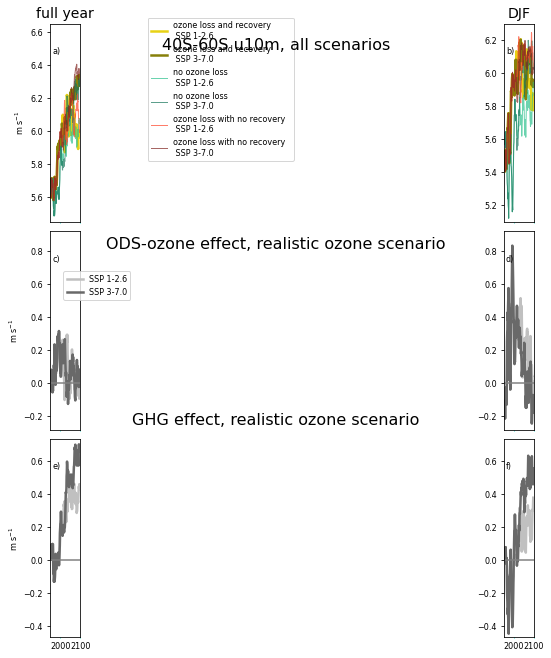

In [62]:
varname = 'u10m'
bd = '/gpfs/home/mep22dku/scratch/SO-wind-feedback/data/SF-u10wind/'
nam = '40S-60S'
get_winds(nam,varname,save = True, var = varname, baseDir = bd)